In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import time
import base64

import insightface
from insightface.app import FaceAnalysis

In [2]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

c:\Users\user\miniforge3\envs\toon\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\user/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\user/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\user/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\user/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\user/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

In [ ]:
def swap_n_show(img1_fn, img2_fn, app, swapper, plot_before=True, plot_after=True):
    
    """
    plot_before : if True shows the images before the swap
    plot_after : if True shows the images after the swap

    returns images with swapped faces.

    Assumes one face per image
    
    """

    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)
    
    
    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:, :, ::-1])
        axs[1].axis('off')
        plt.show()

    #Do the swap 
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img1_ = img1.copy()
    img2_ = img2.copy()

    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img1_[:, :, ::-1])
        axs[1].axis('off')
        plt.show()
    return img1_, img2_


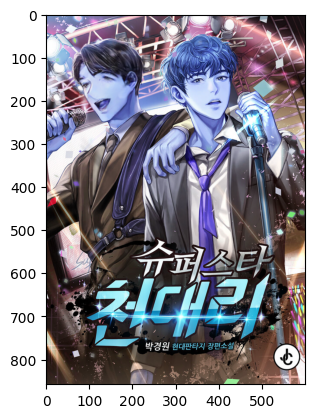

In [19]:
#1. 기본 이미지 처리,
# 리스트에서 값 가져와서 디코딩하고 디텍해서 크롭한 이미지와
# 원본(생성된 삽화)에서 

# b1 = cv2.imread('./static/novel/basic/1695253020_A.png')
# b2 = cv2.imread('./static/novel/basic/1695253020_A.png')

# 이미지 리스트 
# b_list = [b1, b2]
b_list = ['test1.jpg', 'test2.jpg']

# 생성된 삽화
ill = cv2.imread('test3.jpg')

faces = app.get(ill)

for i in range(len(faces)):
    #삽화 속 인물과, 리스트 디텍 얼굴을 스왑. 

    #여기서 이미지 디코드
    face1 = app.get(cv2.imread(b_list[i]))[0]
    face2 = faces[i]

    #ill_ = ill.copy()

    ill = swapper.get(ill, face1, face2, paste_back=True)

plt.imshow(ill)